# Problem 2

### (a) Check CIFAR10

In [73]:
import torch
import torchvision
import torchvision.transforms as transforms

In [74]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [75]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [76]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

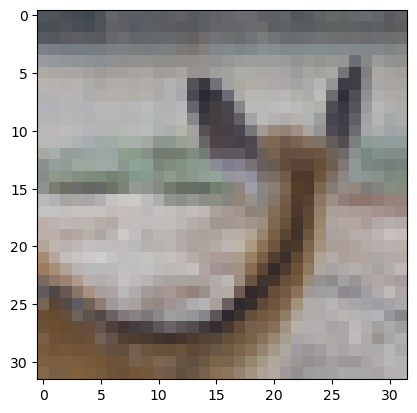

d e e r  


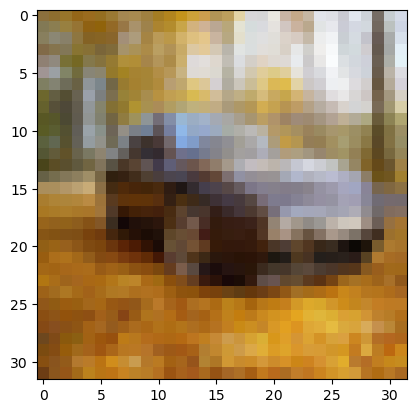

c a r    


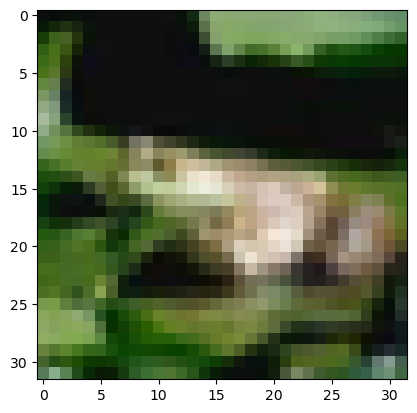

f r o g  


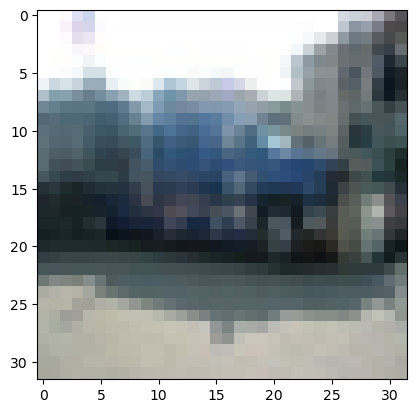

t r u c k


In [77]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
for j in range(4):
    images, labels = next(dataiter)
    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join(f'{classes[labels[0]]:5s}'))

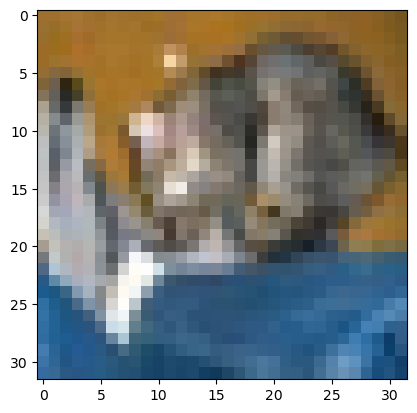

c a t    


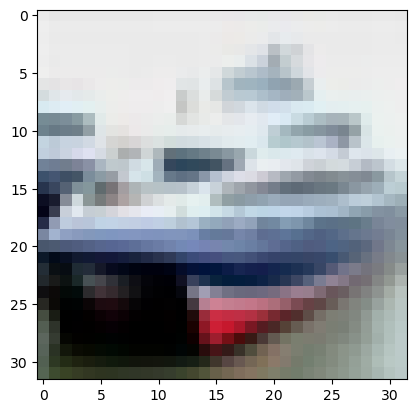

s h i p  


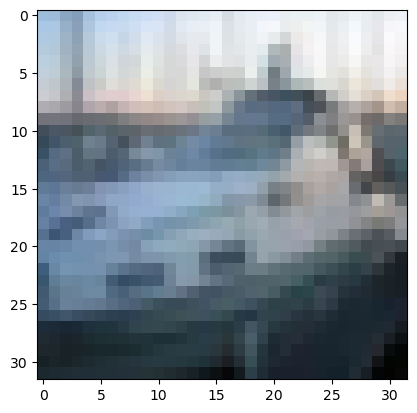

s h i p  


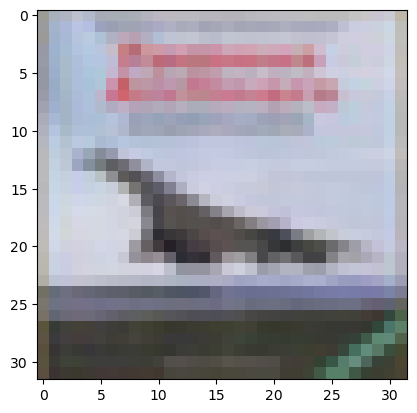

p l a n e


In [78]:
# get some random training images
dataiter = iter(testloader)
for j in range(4):
    images, labels = next(dataiter)
    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join(f'{classes[labels[0]]:5s}'))

### (b) Train 1 hidden layer ReLU

In [79]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

In [80]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# train the model
num_epochs = 20
train_loss_history = []
train_acc_history = []
test_loss_history = []
test_acc_history = []

# Loop through the number of epochs
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    test_loss = 0.0
    test_acc = 0.0

    # set model to train mode
    model.train()
    # iterate over the training data
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        #compute the loss
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        # increment the running loss and accuracy
        train_loss += loss.item()
        train_acc += (outputs.argmax(1) == labels).sum().item()

    # calculate the average training loss and accuracy
    train_loss /= len(trainloader)
    train_loss_history.append(train_loss)
    train_acc /= len(trainloader.dataset)
    train_acc_history.append(train_acc)

    # set the model to evaluation mode
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            test_acc += (outputs.argmax(1) == labels).sum().item()

    # calculate the average validation loss and accuracy
    test_loss /= len(testloader)
    test_loss_history.append(test_loss)
    test_acc /= len(testloader.dataset)
    test_acc_history.append(test_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, train acc: {train_acc:.4f}, val loss: {test_loss:.4f}, val acc: {test_acc:.4f}')

Epoch 1/20, train loss: 8.6009, train acc: 0.1093, val loss: 8.5962, val acc: 0.1309
Epoch 2/20, train loss: 7.9293, train acc: 0.1196, val loss: 7.9118, val acc: 0.1273
Epoch 3/20, train loss: 7.7166, train acc: 0.1180, val loss: 8.2062, val acc: 0.1161
Epoch 4/20, train loss: 7.5305, train acc: 0.1172, val loss: 7.0007, val acc: 0.1056
